<a href="https://colab.research.google.com/github/DonRoboto/CursoMOO/blob/main/Tarea2_evolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bitstring

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import random
import bitstring as bits
from sympy import *
import scipy, pylab

In [3]:
x = Symbol('x')
y = Symbol('y')

f1 = (x-1)**2 + (y-1)**4
f2 = (x+1)**2 + (y+1)**2

In [4]:
class Individuo():
    def __init__(self, x='', y=''):
      if x!='':
        self.f_x = float(x)
        self.f_y = float(y)
      else:
        self.f_x = round(random.uniform(-3, 3),2)
        self.f_y = round(random.uniform(-3, 3),2)
      self.cromosomas()

    def cromosomas(self):
        aux_f_x = bits.BitArray(float=self.f_x, length=32)
        aux_f_y = bits.BitArray(float=self.f_y, length=32)

        self.b_x = list(aux_f_x.bin)
        self.b_y = list(aux_f_y.bin)
 

    def fittnes(self, w1, w2):

      func = (w1 * f1) + (w2 * f2)

      r1_1 = ''.join(self.b_x)
      r1_2 = ''.join(self.b_y)

      r2_1 = bits.BitArray(bin=r1_1).float
      r2_2 = bits.BitArray(bin=r1_2).float

      result = func.subs([(x, r2_1), (y, r2_2)]).doit()
      return result
        

In [5]:
class Poblacion():
  p = []

  def __init__(self, n=''):
    self.p = []
    if n!='':
      for k in range(n):
        i=Individuo()
        self.p.append(i)


  def cruza(self, ind_1, ind_2):
    cro1_1 = ind_1.b_x
    cro1_2 = ind_1.b_y

    cro2_1 = ind_2.b_x
    cro2_2 = ind_2.b_y

    cruza1_x_top = cro1_1[:16]
    cruza1_x_bot = cro1_1[16:]

    cruza1_y_top = cro1_2[:16]
    cruza1_y_bot = cro1_2[16:]

    cruza2_x_top = cro2_1[:16]
    cruza2_x_bot = cro2_1[16:]

    cruza2_y_top = cro2_2[:16]
    cruza2_y_bot = cro2_2[16:]

    hijo_1_x = cruza1_x_top + cruza2_x_bot
    hijo_1_y = cruza1_y_top + cruza2_y_bot

    hijo_2_x = cruza2_x_top + cruza1_x_bot
    hijo_2_y = cruza2_y_top + cruza1_y_bot

    ch_1_x = hijo_1_x
    ch_1_y = hijo_1_y

    chs_1_x = ''.join(ch_1_x)
    chs_1_y = ''.join(ch_1_y)

    h1_2_1 = bits.BitArray(bin=chs_1_x)
    h1_2_2 = bits.BitArray(bin=chs_1_y)
      
    h1_3_1 = h1_2_1.float
    h1_3_2 = h1_2_2.float

    ch_2_x = hijo_2_x
    ch_2_y = hijo_2_y

    chs_2_x = ''.join(ch_2_x)
    chs_2_y = ''.join(ch_2_y)

    h2_2_1 = bits.BitArray(bin=chs_2_x)
    h2_2_2 = bits.BitArray(bin=chs_2_y)
      
    h2_3_1 = h2_2_1.float
    h2_3_2 = h2_2_2.float

    hijo_1 = Individuo(h1_3_1, h1_3_2)
    hijo_2 = Individuo(h2_3_1, h2_3_2)

    return hijo_1, hijo_2 


  def mutacion(self, ind_1):
    index = random.randint(0, 31)

    c_aux_1 = ind_1.b_x[index]
    c_aux_2 = ind_1.b_y[index]

    if c_aux_1=='0':
      ind_1.b_x[index]='1'
    else:
      ind_1.b_x[index]='0'

    if c_aux_2=='0':
      ind_1.b_y[index]='1'
    else:
      ind_1.b_y[index]='0'


In [6]:
p_1 = [i/100 for i in range(0, 101)]
p_2=[]

for i in range(len(p_1)):
  p_2.append(round(1-p_1[i],2))

print(p_1)
print(p_2)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
[1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.68, 0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'f2')

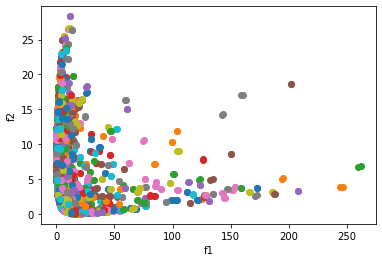

In [7]:
for k in range(len(p_1)):
  w1 = p_1[k]
  w2 = p_2[k]

  pob_i = Poblacion(n=24)

  for m in range(30):
    pob_n = Poblacion()
    pob_aux = Poblacion()


    #seleccionar los que se van a reproducir
    for i in range(0, len(pob_i.p), 2):
      if pob_i.p[i].fittnes(w1, w2)<= pob_i.p[i+1].fittnes(w1, w2):
        pob_aux.p.append(pob_i.p[i])
      else:
        pob_aux.p.append(pob_i.p[i+1])   

    #quenes serán padres
    pad_1 = Individuo()
    pad_2 = Individuo()

    for j in range(0, len(pob_aux.p), 2):
      pad_1 = pob_aux.p[j]
      pad_2 = pob_aux.p[j+1]

      pob_n.p.append(pad_1)
      pob_n.p.append(pad_2)

      #cruza
      h_1, h_2 = pob_n.cruza(pad_1, pad_2)

      #mutacion
      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_1)

      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_2)

      pob_n.p.append(h_1)
      pob_n.p.append(h_2)
  
  g1 = []
  g2 = []

  for i in pob_n.p:
    f1s = f1.subs([ (x, i.f_x), (y, i.f_y) ] ).doit()
    f2s = f2.subs([ (x, i.f_x), (y, i.f_y) ] ).doit()

    g1.append(f1s)    
    g2.append(f2s)  


  ax = pylab.subplot(111)
  ax.scatter(g1, g2)

ax.figure.show()

ax.set_xlabel('f1')
ax.set_ylabel('f2')